# Predict Stock Price - yahoo finance data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


UsageError: Line magic function `%` not found.


#### Load Data

In [3]:
# Read in files and print the information
#train_df = pd.read_csv('AAPL.csv')
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 5)

train_df = web.DataReader("AAPL", 'yahoo', start, end)

#### Explore Data

In [4]:
train_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-23,212.050003,201.000000,209.429993,202.639999,46818000.0,202.639999
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,206.490005
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,204.160004
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999


In [5]:
train_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2436.000000,2436.000000,2436.000000,2436.000000,2.436000e+03,2436.000000
mean,106.702729,104.783091,105.759103,105.764059,7.649025e+07,99.584098
std,51.235204,50.377670,50.778881,50.810023,5.908548e+07,52.058730
min,28.000000,27.178572,27.481428,27.435715,1.136200e+07,23.943514
25%,64.603571,63.158930,63.703929,63.703572,3.225842e+07,56.514045
50%,98.250000,96.605000,97.400002,97.404999,5.745310e+07,90.753090
75%,143.027500,141.122501,142.192501,142.210003,1.042986e+08,136.945278
max,233.470001,229.779999,230.779999,232.070007,4.702495e+08,228.523819


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2436 entries, 2010-01-04 to 2019-09-06
Data columns (total 6 columns):
High         2436 non-null float64
Low          2436 non-null float64
Open         2436 non-null float64
Close        2436 non-null float64
Volume       2436 non-null float64
Adj Close    2436 non-null float64
dtypes: float64(6)
memory usage: 133.2 KB


#### Check for Any Duplicate or NA values.

In [7]:
#Duplicate
train_df.duplicated().sum()

0

In [8]:
#train_df.isnull().sum()
train_df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

#### EDA

/home/kartik/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


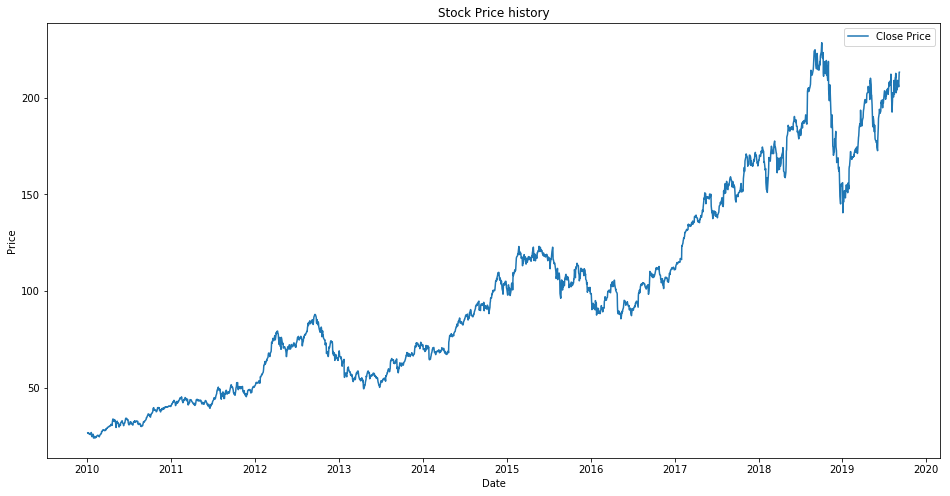

In [9]:
#setting index as date
#train_df['Date'] = pd.to_datetime(train_df.Date,format='%Y-%m-%d')
#train_df.index = train_df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(train_df['Adj Close'], label='Close Price')
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.title('Stock Price history')
plt.legend()

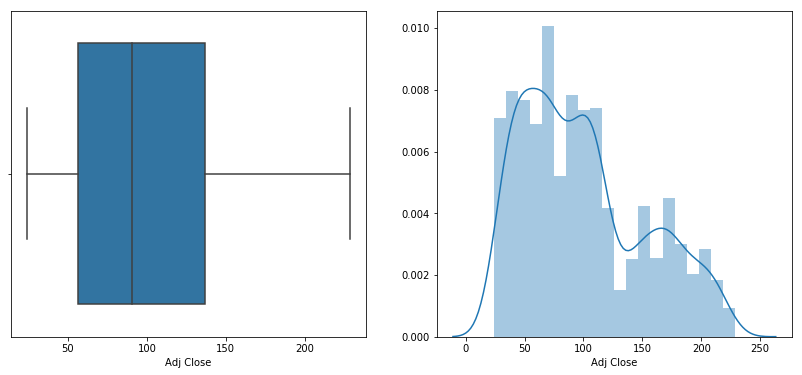

In [10]:
## Plot to se Outliers, bad value and observe distribution for Adj Close
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df['Adj Close'])
plt.subplot(1,2,2)
sns.distplot(train_df['Adj Close'], bins = 20)
plt.show()

In [11]:
# A variable for predicting 'n' days out into the future
num = 20 #'n=20' days
#Create another column Prediction shifted 'n' units up
train_df['Prediction'] = train_df[['Adj Close']].shift(-num)
#print the new data set
print(train_df.tail())
print(train_df.shape)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-08-30  210.449997  207.199997  210.160004  208.740005  21143400.0   
2019-09-03  206.979996  204.220001  206.429993  205.699997  20023000.0   
2019-09-04  209.479996  207.320007  208.389999  209.190002  19188100.0   
2019-09-05  213.970001  211.509995  212.000000  213.279999  23913700.0   
2019-09-06  214.419998  212.509995  214.050003  213.259995  19350800.0   

             Adj Close  Prediction  
Date                                
2019-08-30  208.740005         NaN  
2019-09-03  205.699997         NaN  
2019-09-04  209.190002         NaN  
2019-09-05  213.279999         NaN  
2019-09-06  213.259995         NaN  
(2436, 7)


#### Peocess Data and Create Independent and Dependent Dataset

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
## Create Independent Dataset (X) by remvoving Prediction column.
# Convert the dataframe to a numpy array
X = np.array(train_df.drop(['Prediction'],1))

# Scale Dataset (X) to Normalize Data

X = preprocessing.scale(X)


#### features_df and target_var

In [14]:
# Create Independent Data set (features_df) Remove last 'num = 20' rows.
features_df = X[:-num]
print(features_df)

[[-1.48482846 -1.47800357 -1.48259583 -1.48015363  0.7946417  -1.4006822 ]
 [-1.48178864 -1.475536   -1.47930357 -1.47911314  1.25244202 -1.3997958 ]
 [-1.4827926  -1.48262674 -1.47992264 -1.48870264  1.04192071 -1.40796392]
 ...
 [ 1.78365716  1.77211905  1.78360537  1.79599749 -0.68838905  1.85732699]
 [ 1.81274451  1.76775142  1.76587795  1.83615516 -0.73003896  1.89637308]
 [ 1.89024623  1.87833882  1.86022774  1.92257316 -0.83761538  1.98039895]]


In [15]:
### Create the dependent data set (target_var)  #####
# Convert the dataframe to a numpy array 
target_var = np.array(train_df['Prediction'])
# Get all of the y values except the last '30' rows
target_var = target_var[:-num]
print(target_var)

[ 24.41851616  24.8386631   23.94351387 ... 209.19000244 213.27999878
 213.25999451]


In [16]:
# Split the data into 80% training and 20% testing
train_X, test_X, train_y, test_y = train_test_split(features_df, target_var, test_size = 0.20)

#### Model Generation - Linear Regression

In [17]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
## Checking Score for coefficient of determination R² of the prediction
lr_confidence = lr.score(test_X, test_y)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9813796509389869


Lasso and Ridge Regression

In [19]:
# Lasso Regression.

from sklearn.linear_model import Lasso

lassoReg = Lasso(random_state=20)
lassoReg.fit(train_X, train_y)
lasso_confidence = lassoReg.score(test_X, test_y)
print("lasso regression confidence: ", lasso_confidence)

lasso regression confidence:  0.9802316700247841


In [20]:
# Ridge Regression.

from sklearn.linear_model import Ridge

ridgeReg = Ridge(random_state=21)
ridgeReg.fit(train_X, train_y)
ridge_confidence = ridgeReg.score(test_X, test_y)
print("Ridge regression confidence: ", ridge_confidence)

Ridge regression confidence:  0.9813303688830585


In [21]:
## KNN
from sklearn.neighbors import KNeighborsRegressor

clfknn = KNeighborsRegressor(n_neighbors=3)
clfknn.fit(train_X, train_y)
knn_confidence = clfknn.score(test_X, test_y)
print("knn regression confidence: ", knn_confidence)

knn regression confidence:  0.9829551904713568


In [22]:
## Quadratic Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(train_X, train_y)
clfpoly2_confidence = clfpoly2.score(test_X, test_y)
print("The quadratic regression 2 confidence is : ", clfpoly2_confidence)

The quadratic regression 2 confidence is :  0.9819706821576043


#### Quadratic Regression gave highest score.

In [23]:
#### Prediction..
# Set Predict_X equal to the last 20 rows of the original data set from Adj Close column

Predict_X = X[-num:]

# Print Quadratic Regression model predictions for the next '20' days
Quad_prediction = clfpoly2.predict(Predict_X)
print(Quad_prediction)

[205.27258259 205.8327307  199.57177541 205.07305432 203.74641014
 209.48891371 214.81380386 214.20944177 217.59122037 215.60254493
 196.86522301 211.10729856 206.88731141 211.60974073 213.45452729
 212.93338158 210.89469205 214.57557553 217.13398463 218.77781374]
